# Supervised Learning Sketch


<br/>
<br/><br/><br/>
### ITCS6156/8156 
### Spring 2019

### Minwoo "Jake" Lee


# Today

* Finish previous discussions
* Supervised Learning
  * Regression
  * Classification

# ML Procedure

<p><a href="https://blog.datarobot.com/ai-simplified-what-is-automated-machine-learning?mkt_tok=eyJpIjoiWkRKaVpEZ3dOMkl6TjJVMCIsInQiOiJFUDRWa1A2MFRwWDJhQ0dFQ2dYZlwvc21MdTBuTTl0OTd3Z3F3YWNTVkZTMEpjOHZOZmUrU3F4Y0hGeGM4Y1VSQ0x6bWZ6Vnh6K1hKNDZyeXlwNUIwcUg3WDlrY1JUWHd5S0xBV3lFYkRFODhqWE5wY1wvNU1HaHFNWU5SVlJTMUtzIn0%3D&amp;wvideo=k96yic0jjx"><img src="https://embedwistia-a.akamaihd.net/deliveries/f2a05488965d5ec99e50fd4c96e3da850dfffcd9.jpg?image_play_button_size=2x&amp;image_crop_resized=960x540&amp;image_play_button=1&amp;image_play_button_color=54bbffe0" width="400" height="225" style="width: 400px; height: 225px;"></a></p><p><a href="https://blog.datarobot.com/ai-simplified-what-is-automated-machine-learning?mkt_tok=eyJpIjoiWkRKaVpEZ3dOMkl6TjJVMCIsInQiOiJFUDRWa1A2MFRwWDJhQ0dFQ2dYZlwvc21MdTBuTTl0OTd3Z3F3YWNTVkZTMEpjOHZOZmUrU3F4Y0hGeGM4Y1VSQ0x6bWZ6Vnh6K1hKNDZyeXlwNUIwcUg3WDlrY1JUWHd5S0xBV3lFYkRFODhqWE5wY1wvNU1HaHFNWU5SVlJTMUtzIn0%3D&amp;wvideo=k96yic0jjx">AI Simplified: What is Machine Learning?</a></p>  by Tom (DataRobot)

# In Short...
![](https://cdn-images-1.medium.com/max/1600/1*_QGyIwpgq831xI54cIe_GQ.jpeg)
https://blog.usejournal.com/machine-learning-for-beginners-from-zero-level-8be5b89bf77c

# Classification


<img src="https://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/svm_classifiy.png" width=700 />


# Supervised Learning (Binary Classification Example)

- $f: \mathcal{X} \rightarrow y $
- Input: $\mathbf{x} \in {\rm I\!R}^d = \mathcal{X}$
- Output: $y \in \{-1, +1\}$
- Data: $D = \{ (\mathbf{x}_1, y_1), \dots, (\mathbf{x}_N, y_N) \}$ where $y_i = f(\mathcal{x}_i)$.

# Classifier comparison in scikit.learn



Automatically created module for IPython interactive environment


/Users/mlee173/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/mlee173/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/mlee173/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


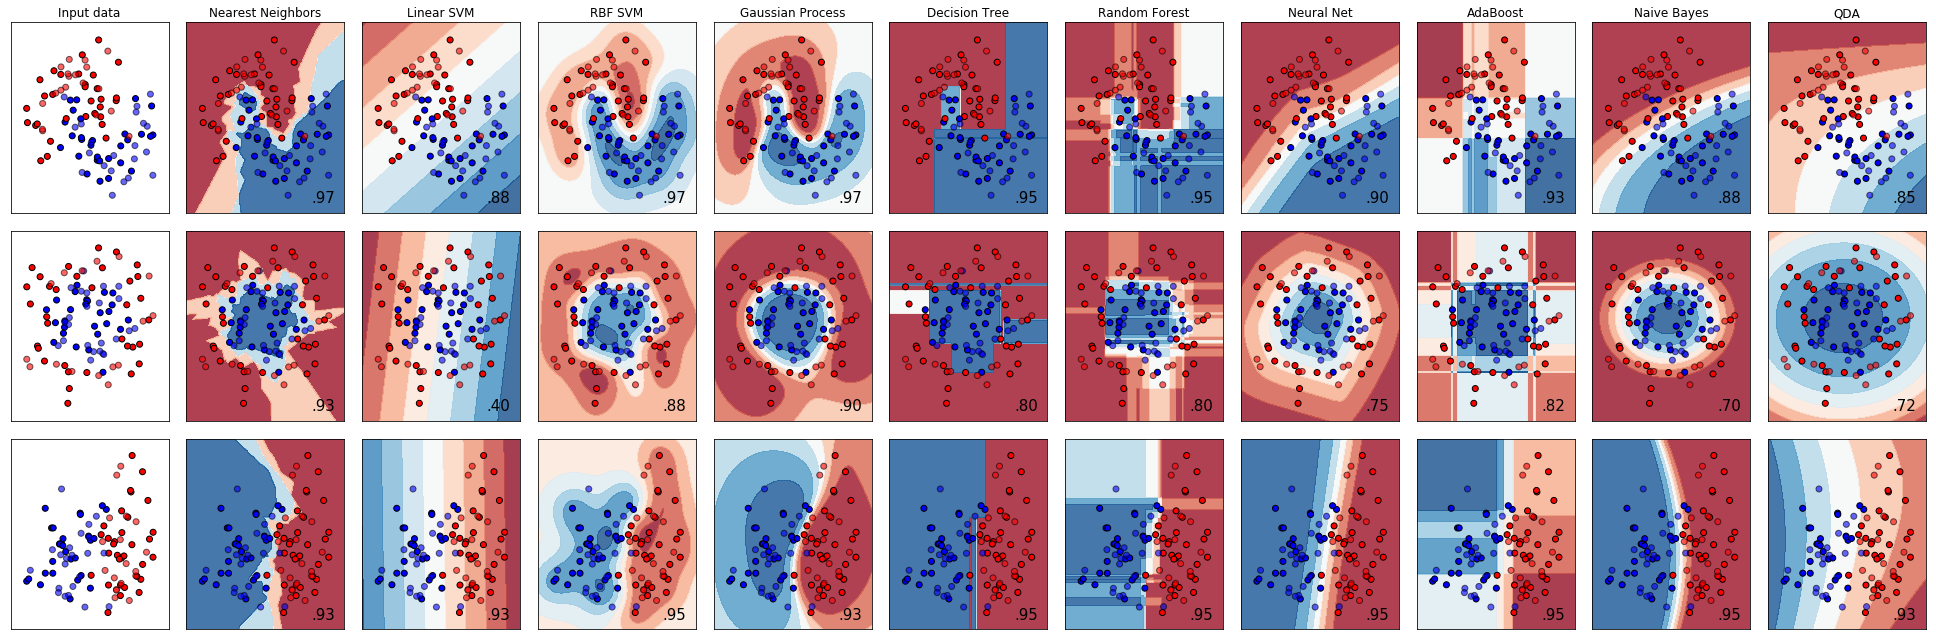

In [1]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % scb`ore).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Regression

<img src="https://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/poly_regress.png" width=800 />

# Supervised Learning (Regression)

- $f: \mathcal{X} \rightarrow y $
- Input: $\mathbf{x} \in {\rm I\!R}^d = \mathcal{X}$
- <font color="red">Output: $y \in {\rm I\!R}$ </font>
- Data: $D = \{ (\mathbf{x}_1, y_1), \dots, (\mathbf{x}_N, y_N) \}$ where $y_i = f(\mathcal{x}_i)$.

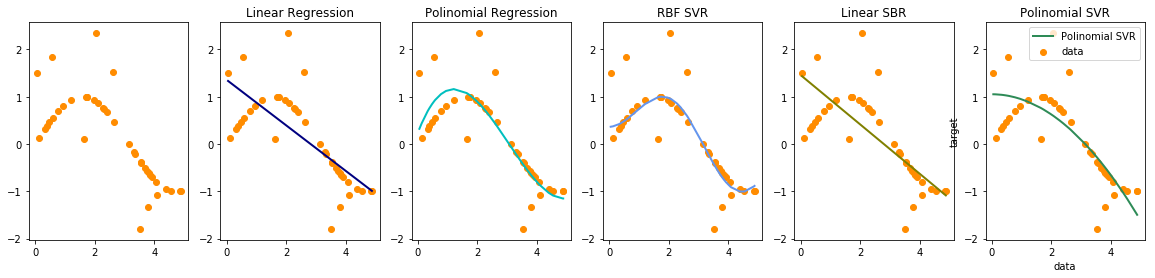

In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
t = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
t[::5] += 3 * (0.5 - np.random.rand(8))


names = ["Linear Regression", "Polinomial Regression", "RBF SVR", 
         "Linear SBR", "Polinomial SVR"]
colors = ["navy", "c", "cornflowerblue", "olive", "seagreen"]

# #############################################################################
# Regression models
regressors = [
    LinearRegression(),
    Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))]),
    SVR(kernel='rbf', C=1e3, gamma=0.1),
    SVR(kernel='linear', C=1e3),
    SVR(kernel='poly', C=1e3, degree=2)
]

i = 1

plt.figure(figsize=(20,4))
plt.subplot(1, len(regressors) + 1, i)
plt.scatter(X, t, color='darkorange', label='data')
lw = 2

for name, color, regr in zip(names, colors, regressors):


    # #############################################################################
    # Fit regression model
    regr.fit(X, t)
    # #############################################################################
    # Prediction
    y = regr.predict(X)

    # #############################################################################
    # Look at the results
    i += 1
    plt.subplot(1, len(regressors) + 1, i)
    plt.scatter(X, t, color='darkorange', label='data')
    plt.plot(X, y, color=color, lw=lw, label=name)
    plt.title(name)

plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

# Next

* Online vs Batch
* Parametric vs non-parametric
* Unsupervised Learning